In [21]:
!pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


This is the dataset from Kaggle Dataset 

In [2]:
import pandas as pd

restaurants_df=pd.read_csv("data/Grab SG Restaurants.csv")

restaurants_df.head()


,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
0,SGDD01085,Texas Chicken,Texas Chicken - VivoCity,Singapore,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",SGD,570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0
1,4-CYTDLPUJEP53N6,Subway,Subway - Vivocity,Singapore,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",SGD,570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0
2,SGDD05605,LiHO Tea,LiHO Tea - Vivo City,Singapore,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",SGD,560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0
3,SGDD07548,Wingstop,Wingstop - VivoCity,Singapore,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",SGD,560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0
4,4-CY2ZLZLTT2EDJ2,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,Singapore,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",SGD,570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0


## Exploratory Data Analysis

Simple exploratory Data Analysis to understand the data

In [3]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_source         16136 non-null  object 
 1   name              16130 non-null  object 
 2   address           16136 non-null  object 
 3   country           16136 non-null  object 
 4   cuisine           16134 non-null  object 
 5   currency          16117 non-null  object 
 6   delivery_cost     16085 non-null  float64
 7   lat               16136 non-null  float64
 8   lon               16136 non-null  float64
 9   opening_hours     16136 non-null  object 
 10  image_url         16125 non-null  object 
 11  radius            16136 non-null  int64  
 12  rating            14004 non-null  float64
 13  reviews_nr        13602 non-null  float64
 14  delivery_options  16136 non-null  object 
 15  promo             8777 non-null   object 
 16  loc_type          16136 non-null  object

So the dataset of 16136 rows of grab restaurants
you can see from the count that there are empty values for each column

In [6]:
restaurants_df.describe()

,delivery_cost,lat,lon,radius,rating,reviews_nr,delivery_time
count,16085.000000,16136.000000,16136.000000,16136.000000,14004.000000,13602.000000,15953.000000
mean,984.926640,1.338491,103.843448,6871.493183,4.238346,343.591604,37.552811
std,656.544752,0.045269,0.062123,6170.013565,0.619217,846.893054,15.728705
min,199.000000,1.230454,103.625677,578.000000,-1.000000,1.000000,15.000000
25%,450.000000,1.304839,103.806196,4999.000000,4.000000,16.000000,28.000000
50%,680.000000,1.332154,103.846004,5000.000000,4.300000,74.000000,34.000000
75%,1610.000000,1.362576,103.885674,5000.000000,4.600000,303.000000,42.000000
max,14000.000000,1.469011,103.997253,25000.000000,5.000000,21113.000000,169.000000


As total rows should be 16136 you can deduce that are null values in delivery_cost, rating, reviews_nr and delivery time. 

I am concern on certain columns:</p>
**name** </p>
**cuisine** </p>
**delivery_cost** </p>
**delivery_time** </p>

The rest of the columns is not that important because we might be dropping the columns or columns like reviews are allowed to be empty.

### Next I want to see the distinct value of each columns to understand the columns better

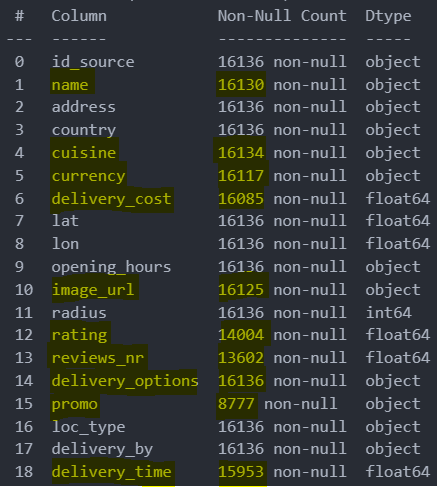

In [6]:
#unique values of address
print(f"These are the unique values of loc_type column {restaurants_df['address'].unique()}\n")

#unique of loc_type 2 types food mart
print(f"These are the unique values of loc_type column {restaurants_df['loc_type'].unique()}\n")

#2 type grab, merchant
print(f"These are the unique values of loc_type column {restaurants_df['delivery_by'].unique()}\n")

# understanding cuisine column values
print(f"These are the unique values of loc_type column {restaurants_df['cuisine'].unique()}\n")

# understanding delivery_options column values
print(f"These are the unique values of loc_type column {restaurants_df['delivery_options'].unique()}\n")

These are the unique values of loc_type column ['Texas Chicken - VivoCity' 'Subway - Vivocity' 'LiHO Tea - Vivo City' ...
 'Raj Restaurant - SOHO @ Farrer'
 'Albismi Indian Muslim Food - Woodlands Road'
 'Zam Zam Indian Special Food - Yishun Industrial Park A']

These are the unique values of loc_type column ['FOOD' 'MART']

These are the unique values of loc_type column ['GRAB' 'MERCHANT']

These are the unique values of loc_type column ['["Western", "Fast Food", "Halal", "Chicken", "Beverages"]'
 '["Healthy", "Sandwiches", "Fast Food", "Halal", "Western"]'
 '["Same Prices In-Store", "Beverages", "Local", "Bubble Tea"]' ...
 '["Chicken", "Korean", "Fried Chicken"]'
 '["Asian", "Bakery & Cake", "Breakfast & Brunch", "Singaporean"]'
 '["Japanese", "Noodles", "Grill"]']

These are the unique values of loc_type column ['ONLY_DELIVERY' 'DELIVERY_TAKEAWAY' 'DELIVERY_DINEIN'
 'DELIVERY_TAKEAWAY_DINEIN']



### Investigating the null values

**name** </p>
**cuisine** </p>
**delivery_cost** </p>
**delivery_time** </p>

#### name column
First is the name column as the expected count is 16136 but only 16130 is shown there should be 6 null values.</p> 
As you can see below are 6 stores where the name is null and shows most are test stores, probably that this are stores that was given as trial but did not convert to convert to GRAB stores.

Conclusion to drop this 6 stores

In [12]:

restaurants_df[restaurants_df['name'].isna()]

,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
628,4-CZDJJTWFC8BAAN,NaN,[TEST] - A-One,Singapore,"[""Kids Friendly"", ""Comfort Foods""]",SGD,560.0,1.266722,103.690919,"{""open"": true, ""displayedHours"": ""00:00-23:59""...",https://d1sag4ddilekf6.cloudfront.net/compress...,2500,NaN,NaN,ONLY_DELIVERY,NaN,FOOD,GRAB,27.0
631,4-C2T2GYAJBEVFJN,NaN,[Test] Fish & Co.,Singapore,"[""Fish & Chips""]",SGD,610.0,1.267965,103.693351,"{""open"": true, ""displayedHours"": ""00:00-23:59""...",https://d1sag4ddilekf6.cloudfront.net/compress...,2500,NaN,NaN,ONLY_DELIVERY,NaN,FOOD,GRAB,28.0
688,4-CZLVCKMHNYTXNX,NaN,[Test] Shake Shack,Singapore,"[""Burger"", ""Fast Food"", ""Western""]",SGD,560.0,1.266722,103.690919,"{""open"": true, ""displayedHours"": ""00:00-23:59""...",https://d1sag4ddilekf6.cloudfront.net/compress...,3000,NaN,NaN,ONLY_DELIVERY,NaN,FOOD,GRAB,27.0
692,4-CZKKR7K2JJ22NT,NaN,[Test] The Coffee Bean & Tea Leaf - KK Hospital,Singapore,"[""Coffee & Tea""]",SGD,560.0,1.266722,103.690919,"{""open"": true, ""displayedHours"": ""10:00-20:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,2500,NaN,NaN,ONLY_DELIVERY,NaN,FOOD,GRAB,27.0
702,4-CYNANF42AEVAVA,NaN,CBTL Test Store - Classic,Singapore,"[""Singaporean"", ""Kids Friendly""]",SGD,500.0,1.267965,103.693351,"{""open"": true, ""displayedHours"": ""00:00-23:59""...",https://d1sag4ddilekf6.cloudfront.net/compress...,3200,NaN,NaN,ONLY_DELIVERY,NaN,FOOD,GRAB,29.0
1031,4-CZEXEPEWN6KKEN,NaN,FOODQA-BJ_SG's Sea Resto GKMM Mart,Singapore,"[""test"", ""Wellness""]",SGD,1200.0,1.230454,103.646681,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,10000,NaN,NaN,ONLY_DELIVERY,"Enjoy 20% off min. spend $25 with promo code ""...",MART,GRAB,53.0


#### Cuisine column null values
HAPPY THAI kitchen in clementi i have researched that it is permanently closed, will drop this restaurant i have checked the longtitude and latitude of the order which is westcoast
https://www.google.com/search?hl=en-SG&gl=sg&q=431+Clementi+Ave+3,+%2301-296+Happy+Thai+Kitchen,+Singapore+120431&ludocid=9550498111253404072&lsig=AB86z5XMdpT1YVyvduw5eaJZY3L5&hl=en&gl=SG
</p>
RELAX BAR, have to opdate the cuisine  with korean BBQ 

In [13]:
restaurants_df[restaurants_df['cuisine'].isna()]

,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
2473,4-CZB3EYJJMEUBAX,HAPPY THAI KITCHEN,HAPPY THAI KITCHEN,Singapore,NaN,SGD,1890.0,1.303437,103.765536,"{""displayedHours"": ""Closed"", ""sun"": ""04:00-04:...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,4.1,102.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,35.0
15049,4-C2EVG4BDGEVTG6,Relax Bar,Relax Bar - The Punggol Settlement,Singapore,NaN,SGD,1900.0,1.420844,103.912429,"{""displayedHours"": ""Closed"", ""sun"": ""15:00-22:...",https://d1sag4ddilekf6.cloudfront.net/compress...,5000,5.0,2.0,DELIVERY_TAKEAWAY,20% off with S$35.00 min. order,FOOD,GRAB,36.0


In [15]:
restaurants_df[restaurants_df['delivery_cost'].isna()]

,id_source,name,address,country,cuisine,currency,delivery_cost,lat,lon,opening_hours,image_url,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time
623,4-CZDWKEXJV7EYNN,Dosirak,Dosirak - Downtown Gallery - Catering,Singapore,"[""Healthy"", ""Korean"", ""Catering""]",SGD,NaN,1.276788,103.848262,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,NaN,NaN,DELIVERY_TAKEAWAY,NaN,FOOD,MERCHANT,70.0
647,4-C2MTV33CJZLUSE,Lister,Lister - Tradehub 21,Singapore,"[""Health & Wellness"", ""Mart"", ""Local"", ""Wellne...",SGD,NaN,1.328091,103.752165,"{""open"": true, ""displayedHours"": ""00:00-23:59""...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,NaN,NaN,ONLY_DELIVERY,"Enjoy 20% off min. spend $25 with promo code ""...",MART,MERCHANT,60.0
893,4-CZKKEBUFAFKGCX,The Grocery Co,The Grocery Co - By DKSH - Jalan Buroh (Next D...,Singapore,"[""Mart"", ""Groceries"", ""Local"", ""Convenience""]",SGD,NaN,1.317135,103.715203,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,10000,2.0,23.0,ONLY_DELIVERY,"Enjoy 20% off min. spend $25 with promo code ""...",MART,MERCHANT,NaN
993,4-CZKKEBWJAJWCR2,The Digital Pharmacy Co,The Pharmacy Co - By DKSH - Jalan Buroh (Next ...,Singapore,"[""Wellness"", ""Health & Wellness"", ""Mart"", ""Loc...",SGD,NaN,1.317135,103.715203,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,15000,NaN,NaN,ONLY_DELIVERY,NaN,MART,MERCHANT,NaN
1009,4-C2KTCUK1PE22CT,Norwegian Salmon Pte. Ltd.,Norwegian Salmon Pte. Ltd. - The Quayside,Singapore,"[""Seafood"", ""Frozen Food"", ""Fresh Produce"", ""I...",SGD,NaN,1.290229,103.838911,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,NaN,NaN,ONLY_DELIVERY,"Enjoy 20% off min. spend $25 with promo code ""...",MART,MERCHANT,53.0
1039,4-C2NZNF6YLTL3PE,Asyura Paste,Asyura Paste - Jurong Food Hub,Singapore,"[""Asian"", ""Groceries"", ""Halal"", ""Mart"", ""Islan...",SGD,NaN,1.308686,103.721884,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,10000,NaN,NaN,ONLY_DELIVERY,"Enjoy 20% off min. spend $25 with promo code ""...",MART,MERCHANT,NaN
1043,4-C2TVNK62ELN3KE,Kidmoro,Kidmoro - Tuas Ave 1,Singapore,"[""Kids Friendly"", ""Mart"", ""Islandwide Delivery""]",SGD,NaN,1.321670,103.659920,"{""displayedHours"": ""Closed"", ""sun"": ""Closed"", ...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,NaN,NaN,ONLY_DELIVERY,50% off United Sports Double Shoot-Out Arcade ...,MART,MERCHANT,NaN
1146,4-CZDWKEXCPB31RT,Dosirak,Dosirak - 313-Somerset - Catering,Singapore,"[""Healthy"", ""Korean"", ""Catering""]",SGD,NaN,1.301509,103.838394,"{""displayedHours"": ""Closed"", ""sun"": ""10:00-21:...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,4.0,2.0,DELIVERY_TAKEAWAY,"Use ""GRAB5313"" to enjoy a $5 discount, min spe...",FOOD,MERCHANT,70.0
2165,4-CZC2APLUCNTWN2,Smoof,Smoof - Cecil Street,Singapore,"[""Dessert"", ""Smoothies""]",SGD,NaN,1.278921,103.846877,"{""displayedHours"": ""Closed"", ""sun"": ""05:00-06:...",https://d1sag4ddilekf6.cloudfront.net/compress...,2500,3.4,5.0,DELIVERY_TAKEAWAY,NaN,FOOD,MERCHANT,70.0
2176,4-CZD3RK6TGUKJDE,Napolizz Pizza,Napolizz Pizza - Havelock2 - Catering,Singapore,"[""Same Prices In-Store"", ""Western"", ""Pizza"", ""...",SGD,NaN,1.287153,103.844769,"{""open"": true, ""displayedHours"": ""11:30-22:00""...",https://d1sag4ddilekf6.cloudfront.net/compress...,25000,NaN,NaN,DELIVERY_TAKEAWAY,NaN,FOOD,MERCHANT,60.0


In [ ]:
restaurant_df = main_df[['Id_source', 'name', 'address', 'rating', 'reviews_nr', 'opening_hr', 'delivery_time']]


In [9]:
#creating a new dataframe with only the cuisine category
cuisine_df=pd.DataFrame(columns=['source_id','cuisine'])

#iterate rows through each row of the original main_df

for idx,row in main_df.iterrows():
    #extract cuisine type
    cuisines = row['cuisine']

    #iterate through each cuisine type 
    for cuisine in cuisines:
        #append the cuisine type and source column ID to the newly created cuisine_df
        cuisine_df=cuisine_df.append({'source_id': row['source_id','cuisine': cuisine]}, ignore_index=True)

cuisine_df.head()

AttributeError: 'DataFrame' object has no attribute 'append'